# Data Preprocess

In [1]:
import pandas as pd
import os
from rdkit import Chem
import matplotlib.pyplot as plt
from rdkit.Chem.Scaffolds import MurckoScaffold

In [2]:
# get path
os.getcwd()

'/Users/whj/Documents/hERG_ChEMBL240/Data_prepropress'

## 1. Import Raw_data

In [3]:
df1 = pd.read_excel('/Users/whj/Documents/hERG_ChEMBL240/Data/Raw_data.xlsx')
df1.head()

,Canonical_smiles,IC50(nM)
0,COc1cc2nc(nc(N)c2cc1OC)N3CCN(CC3)C(=O)c4occc4,1584.89
1,CCN1C=C(C(=O)O)C(=O)c2cc(F)c(cc12)N3CCNCC3,1000000.00
2,C[S+]([O-])c1ccc(cc1)c2nc(c3ccc(F)cc3)c([nH]2)...,1000000.00
3,CN(C)CCCN1c2ccccc2CCc3ccccc13,3388.44
4,CN1C(=O)CN=C(c2ccccc2)c3cc(Cl)ccc13,1000000.00


In [4]:
df1_2 = df1  
len(df1_2)

8337

There are 8337 molecules in Raw_data.

## 2. Make different threshold datasets

In [5]:
df1_2.loc[df1_2['IC50(nM)'] <= 1000, 'ClassA'] = '1'
df1_2.loc[df1_2['IC50(nM)'] > 1000, 'ClassA'] = '0'

df1_2.loc[df1_2['IC50(nM)'] <= 1000, 'ClassB'] = '1'
df1_2.loc[df1_2['IC50(nM)'] > 10000, 'ClassB'] = '0'

df1_2.loc[df1_2['IC50(nM)'] <= 1000, 'ClassC'] = '1'
df1_2.loc[df1_2['IC50(nM)'] > 20000, 'ClassC'] = '0'

df1_2.loc[df1_2['IC50(nM)'] <= 1000, 'ClassD'] = '1'
df1_2.loc[df1_2['IC50(nM)'] > 30000, 'ClassD'] = '0'

df1_2.loc[df1_2['IC50(nM)'] <= 1000, 'ClassE'] = '1'
df1_2.loc[df1_2['IC50(nM)'] > 40000, 'ClassE'] = '0'

df1_2.loc[df1_2['IC50(nM)'] <= 10000, 'ClassI'] = '1'
df1_2.loc[df1_2['IC50(nM)'] > 10000, 'ClassI'] = '0'

df1_2.loc[df1_2['IC50(nM)'] <= 20000, 'ClassJ'] = '1'
df1_2.loc[df1_2['IC50(nM)'] > 20000, 'ClassJ'] = '0'

df1_2.head()

,Canonical_smiles,IC50(nM),ClassA,ClassB,ClassC,ClassD,ClassE,ClassI,ClassJ
0,COc1cc2nc(nc(N)c2cc1OC)N3CCN(CC3)C(=O)c4occc4,1584.89,0,NaN,NaN,NaN,NaN,1,1
1,CCN1C=C(C(=O)O)C(=O)c2cc(F)c(cc12)N3CCNCC3,1000000.00,0,0,0,0,0,0,0
2,C[S+]([O-])c1ccc(cc1)c2nc(c3ccc(F)cc3)c([nH]2)...,1000000.00,0,0,0,0,0,0,0
3,CN(C)CCCN1c2ccccc2CCc3ccccc13,3388.44,0,NaN,NaN,NaN,NaN,1,1
4,CN1C(=O)CN=C(c2ccccc2)c3cc(Cl)ccc13,1000000.00,0,0,0,0,0,0,0


In [6]:
# make random data and idx
df_rdm = df1_2.sample(frac=1, random_state=66)
df_rdm.head()

,Canonical_smiles,IC50(nM),ClassA,ClassB,ClassC,ClassD,ClassE,ClassI,ClassJ
8104,Cc1c2COC(=O)c2ccc1[C@@H](O)CN3CCC4(CC3)CN(C4)c...,10500.00,0,0,NaN,NaN,NaN,0,1
3441,ONC(=O)\C=C\c1ccc2CN(Cc2c1)C(=O)Cc3ccccc3,30000.00,0,0,0,NaN,NaN,0,0
2028,Fc1ccc(cc1)S(=O)(=O)NC(=O)NC2CCN(Cc3ccn(c3)c4c...,31600.00,0,0,0,0,NaN,0,0
806,OC=O.Fc1cc(F)cc(c1)C(=O)N2CCN(C(=O)C2)c3ccc(OC...,7943.28,0,NaN,NaN,NaN,NaN,1,1
1558,OC(=O)C1CCN(Cc2ccc(Oc3nc4ccccc4s3)cc2)CC1,30000.00,0,0,0,NaN,NaN,0,0


In [7]:
# add Number for each molecule
df_rdm['No'] = range(1,len(df_rdm)+1)
df_rdm.head()

,Canonical_smiles,IC50(nM),ClassA,ClassB,ClassC,ClassD,ClassE,ClassI,ClassJ,No
8104,Cc1c2COC(=O)c2ccc1[C@@H](O)CN3CCC4(CC3)CN(C4)c...,10500.00,0,0,NaN,NaN,NaN,0,1,1
3441,ONC(=O)\C=C\c1ccc2CN(Cc2c1)C(=O)Cc3ccccc3,30000.00,0,0,0,NaN,NaN,0,0,2
2028,Fc1ccc(cc1)S(=O)(=O)NC(=O)NC2CCN(Cc3ccn(c3)c4c...,31600.00,0,0,0,0,NaN,0,0,3
806,OC=O.Fc1cc(F)cc(c1)C(=O)N2CCN(C(=O)C2)c3ccc(OC...,7943.28,0,NaN,NaN,NaN,NaN,1,1,4
1558,OC(=O)C1CCN(Cc2ccc(Oc3nc4ccccc4s3)cc2)CC1,30000.00,0,0,0,NaN,NaN,0,0,5


## Output total atom number of molecules distributation and note total atom number of molecules >=45 

60 CC(C)Oc1ccc(F)cc1c2ccc(nc2)N3CCC(CNC(=O)c4ccc(cc4)c5oc6c(cc(cc6n5)C#N)C(C)C)CC3
321 O=C(Nc1ccccc1)C2=NN(\C(=C/3\S\C(=N/c4nc(cc(c5ccccc5)c4C#N)c6ccccc6)\N(C3=O)c7ccccc7)\S2)c8ccccc8
532 COC(=O)N[C@@H](C(C)C)C(=O)N1C[C@@H](C)C[C@H]1c2ncc([nH]2)c3ccc(cc3)c4ccc(s4)c5cc6[nH]c(nc6s5)[C@@H]7C[C@H](C)CN7C(=O)[C@@H](NC(=O)OC)C(C)C
534 COc1c(cc(cc1C(C)(C)C)C(=O)N2CCN(C[C@@H]2C)C(=O)CCCCC(c3ccc(F)cc3)c4ccc(F)cc4)C(C)(C)C
537 Oc1cc(F)ccc1C(=O)N2CCC(CCN3CCC(CC3)N(C(=O)NCc4ccc(cc4)C#N)c5cccc(F)c5)(CC2)c6cccc(F)c6
641 CCOc1nc(NC(=O)C2(CCC2)NC(=O)c3ccc4c(C5CCCC5)c(c6ccc(F)cn6)n(C)c4c3)ccc1\C=C\C(=O)O
775 CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@](C)(C[C@H](C)O2)OC)[C@H](C)[C@@H](O[C@@H]3O[C@H](C)C[C@@H]([C@H]3O)N(C)C(C)C)[C@](C)(O)C[C@@H](C)[C@H](OCC(=O)NC)[C@H](C)[C@@H](O)[C@]1(C)O
929 COc1c(cc(cc1C(C)(C)C)C(=O)NC[C@H]2CCN(C2)C(=O)CCCCC(c3ccc(F)cc3)c4ccc(F)cc4)C(C)(C)C
930 CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(OC)[C@@H](O)[C@H](C)O2)[C@H](C)[C@@H](O[C@@H]3O[C@H](C)C[C@@H]([C@H]3O)N(C)C)[C@]

,Canonical_smiles,IC50(nM),ClassA,ClassB,ClassC,ClassD,ClassE,ClassI,ClassJ,No,Delete
8104,Cc1c2COC(=O)c2ccc1[C@@H](O)CN3CCC4(CC3)CN(C4)c...,10500.00,0,0,NaN,NaN,NaN,0,1,1,0
3441,ONC(=O)\C=C\c1ccc2CN(Cc2c1)C(=O)Cc3ccccc3,30000.00,0,0,0,NaN,NaN,0,0,2,0
2028,Fc1ccc(cc1)S(=O)(=O)NC(=O)NC2CCN(Cc3ccn(c3)c4c...,31600.00,0,0,0,0,NaN,0,0,3,0
806,OC=O.Fc1cc(F)cc(c1)C(=O)N2CCN(C(=O)C2)c3ccc(OC...,7943.28,0,NaN,NaN,NaN,NaN,1,1,4,0
1558,OC(=O)C1CCN(Cc2ccc(Oc3nc4ccccc4s3)cc2)CC1,30000.00,0,0,0,NaN,NaN,0,0,5,0


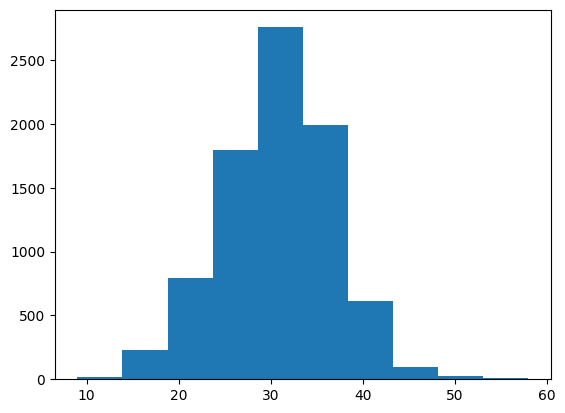

In [8]:
dataheader = ['Delete']
df_rdm['Delete']='0'
max_atom = 0
atom_num_lis = []
cnt = 0 #calculate atom number bigger than 45
for i, word in enumerate(df_rdm['Canonical_smiles']):
    mol = Chem.MolFromSmiles(word) #smile to molecule
    num_atom = mol.GetNumAtoms() #get all the number of a atom
    atom_num_lis.append(num_atom) # use a list to collect
    if num_atom > 45:
        df_rdm.iloc[i,-1]='1'
        print(i,word)
        cnt += 1
    if num_atom > max_atom:
        max_atom = num_atom
print(max_atom)
plt.hist(atom_num_lis)
print(cnt) # atom > 45
df_rdm.head()

In [9]:
# remove total atom number of molecule more than 45
df3_ = df_rdm[df_rdm['Delete'].isin(['0'])]
df3 = df3_.drop(['Delete'], axis=1)
df3.head()

,Canonical_smiles,IC50(nM),ClassA,ClassB,ClassC,ClassD,ClassE,ClassI,ClassJ,No
8104,Cc1c2COC(=O)c2ccc1[C@@H](O)CN3CCC4(CC3)CN(C4)c...,10500.00,0,0,NaN,NaN,NaN,0,1,1
3441,ONC(=O)\C=C\c1ccc2CN(Cc2c1)C(=O)Cc3ccccc3,30000.00,0,0,0,NaN,NaN,0,0,2
2028,Fc1ccc(cc1)S(=O)(=O)NC(=O)NC2CCN(Cc3ccn(c3)c4c...,31600.00,0,0,0,0,NaN,0,0,3
806,OC=O.Fc1cc(F)cc(c1)C(=O)N2CCN(C(=O)C2)c3ccc(OC...,7943.28,0,NaN,NaN,NaN,NaN,1,1,4
1558,OC(=O)C1CCN(Cc2ccc(Oc3nc4ccccc4s3)cc2)CC1,30000.00,0,0,0,NaN,NaN,0,0,5


In [10]:
# add murcko core structure
muko_lis = []
for i, word in enumerate(df3['Canonical_smiles']):
    muko = MurckoScaffold.MurckoScaffoldSmilesFromSmiles(word)
    muko_lis.append(muko)
df3['Murcko'] = muko_lis
df3.head()

,Canonical_smiles,IC50(nM),ClassA,ClassB,ClassC,ClassD,ClassE,ClassI,ClassJ,No,Murcko
8104,Cc1c2COC(=O)c2ccc1[C@@H](O)CN3CCC4(CC3)CN(C4)c...,10500.00,0,0,NaN,NaN,NaN,0,1,1,O=C1OCc2cc(CCN3CCC4(CC3)CN(c3ccccn3)C4)ccc21
3441,ONC(=O)\C=C\c1ccc2CN(Cc2c1)C(=O)Cc3ccccc3,30000.00,0,0,0,NaN,NaN,0,0,2,O=C(Cc1ccccc1)N1Cc2ccccc2C1
2028,Fc1ccc(cc1)S(=O)(=O)NC(=O)NC2CCN(Cc3ccn(c3)c4c...,31600.00,0,0,0,0,NaN,0,0,3,O=C(NC1CCN(Cc2ccn(-c3ccccc3)c2)CC1)NS(=O)(=O)c...
806,OC=O.Fc1cc(F)cc(c1)C(=O)N2CCN(C(=O)C2)c3ccc(OC...,7943.28,0,NaN,NaN,NaN,NaN,1,1,4,O=C(c1ccccc1)N1CCN(c2ccc(OC3CCN(C4CCCC4)CC3)cc...
1558,OC(=O)C1CCN(Cc2ccc(Oc3nc4ccccc4s3)cc2)CC1,30000.00,0,0,0,NaN,NaN,0,0,5,c1ccc2sc(Oc3ccc(CN4CCCCC4)cc3)nc2c1


In [11]:
len(df3)

8253

There are 8253 molecules after removing 

In [12]:
# save all dataset in csv
df3.to_csv('/Users/whj/Documents/hERG_ChEMBL240/Data/ChEMBL240_1_1295_all_8253.csv')

In [13]:
# create a dataset for ClassA': IC50 <= 1000 nM and IC50 > 1000 nM
df4a_ = df3[['Canonical_smiles', 'Murcko', 'ClassA', 'No']]
df4a = df4a_.dropna(axis=0, how='any', subset=None, inplace=False)
df4a.head()

,Canonical_smiles,Murcko,ClassA,No
8104,Cc1c2COC(=O)c2ccc1[C@@H](O)CN3CCC4(CC3)CN(C4)c...,O=C1OCc2cc(CCN3CCC4(CC3)CN(c3ccccn3)C4)ccc21,0,1
3441,ONC(=O)\C=C\c1ccc2CN(Cc2c1)C(=O)Cc3ccccc3,O=C(Cc1ccccc1)N1Cc2ccccc2C1,0,2
2028,Fc1ccc(cc1)S(=O)(=O)NC(=O)NC2CCN(Cc3ccn(c3)c4c...,O=C(NC1CCN(Cc2ccn(-c3ccccc3)c2)CC1)NS(=O)(=O)c...,0,3
806,OC=O.Fc1cc(F)cc(c1)C(=O)N2CCN(C(=O)C2)c3ccc(OC...,O=C(c1ccccc1)N1CCN(c2ccc(OC3CCN(C4CCCC4)CC3)cc...,0,4
1558,OC(=O)C1CCN(Cc2ccc(Oc3nc4ccccc4s3)cc2)CC1,c1ccc2sc(Oc3ccc(CN4CCCCC4)cc3)nc2c1,0,5


In [14]:
# save imbalanced dataset for ClassA
df4a.to_csv('/Users/whj/Documents/hERG_ChEMBL240/Data/Imbalanced/ChEMBL240_1_1_1295_6958.csv')

In [15]:
# make balanced dataset from ClassA
df4a_1 = df4a[df4a["ClassA"].isin(["1"])]
# Calculate blocker
df4a_1
df4a[df4a['ClassA']=='0'].count()
df4a_0 = df4a[df4a["ClassA"].isin(["0"])]
# Calculate non-blocker
df4a_0
# randomly select non-blocker
df4a_0r = df4a_0.sample(frac=1, random_state=66)
df4a_0b = df4a_0r.iloc[:1295,:]
df4a_0b
df5a = pd.concat([df4a_1, df4a_0b], axis=0)
# make random data and idx
df5a = df5a.sample(frac=1, random_state=66)
df5a.head()

,Canonical_smiles,Murcko,ClassA,No
2696,C[C@H](c1cccnc1F)c2c(CCN(C)C)sc3ccccc23,c1cncc(Cc2csc3ccccc23)c1,0,1555
2541,CCC(CC)NCCCc1cc(nc(n1)C#N)c2cccc(c2)C(F)(F)F,c1ccc(-c2ccncn2)cc1,1,7054
8288,CC(C)(N)c1nc(c[nH]1)c2ccc(Cl)cc2,c1ccc(-c2c[nH]cn2)cc1,0,2676
7732,Cc1nccn1c2ccc(cn2)c3cn(CC(=O)Nc4cccc(Cl)c4Cl)nn3,O=C(Cn1cc(-c2ccc(-n3ccnc3)nc2)nn1)Nc1ccccc1,0,2174
2029,Clc1ccc(cc1)[C@H](OC2CN(C2)C(=O)N3CCCCC3)c4ccc...,O=C(N1CCCCC1)N1CC(OC(c2ccccc2)c2cccnc2)C1,0,3996


In [16]:
# save balanced dataset for ClassA
df5a.to_csv('/Users/whj/Documents/hERG_ChEMBL240/Data/Balanced/ChEMBL240_1_1.csv')

In [17]:
# create a dataset for ClassB': IC50 <= 1000 nM and IC50 > 10000 nM
df4b_ = df3[['Canonical_smiles', 'Murcko', 'ClassB', 'No']]
df4b_
df4b = df4b_.dropna(axis=0, how='any', subset=None, inplace=False)
df4b
# make balanced dataset from ClassB
df4b_1 = df4b[df4b["ClassB"].isin(["1"])]
# Calculate blocker
df4b_1
df4b[df4b['ClassB']=='0'].count()
df4b_0 = df4b[df4b["ClassB"].isin(["0"])]
# Calculate non-blocker
df4b_0
# randomly select non-blocker
df4b_0r = df4b_0.sample(frac=1, random_state=66)
df4b_0r
df4b_0b = df4b_0r.iloc[:1295,:]
df4b_0b
df5b = pd.concat([df4b_1, df4b_0b], axis=0)
# make random data and idx
df5b = df5b.sample(frac=1, random_state=66)
df5b.head()

,Canonical_smiles,Murcko,ClassB,No
5723,COc1ncnc(Cn2cc(C(=O)NCCO)c3ncc(C)cc23)c1C,c1cnc2ccn(Cc3ccncn3)c2c1,0,3025
2541,CCC(CC)NCCCc1cc(nc(n1)C#N)c2cccc(c2)C(F)(F)F,c1ccc(-c2ccncn2)cc1,1,7054
4484,COc1ncc(cn1)c2cccc3OC[C@H](Cc23)NC(=O)c4ccc(OC...,O=C(NC1COc2cccc(-c3cncnc3)c2C1)c1cccnc1,0,850
6478,O[C@@]1(CC23CCC(CC2)(CO3)NCc4ccc5SCC(=O)Nc5n4)...,O=C1CSc2ccc(CNC34CCC(CC5Cn6c(=O)ccc7nccc5c76)(...,0,8254
3093,CC(=O)OCC(COC(=O)C)OC(=O)C,,0,7836


In [18]:
# save imbalanced dataset for ClassB
df4b.to_csv('/Users/whj/Documents/hERG_ChEMBL240/Data/Imbalanced/ChEMBL240_1_10_1295_3722.csv')
# save balanced dataset for ClassB
df5b.to_csv('/Users/whj/Documents/hERG_ChEMBL240/Data/Balanced/ChEMBL240_1_10.csv')

In [19]:
# create a dataset for ClassC': IC50 <= 1000 nM and IC50 > 20000 nM
df4c_=df3[['Canonical_smiles', 'Murcko', 'ClassC', 'No']]
df4c_
df4c=df4c_.dropna(axis=0, how='any', subset=None, inplace=False)
df4c
# make balanced dataset from ClassB
df4c_1=df4c[df4c["ClassC"].isin(["1"])]
# Calculate blocker
df4c_1
df4c[df4c['ClassC']=='0'].count()
df4c_0=df4c[df4c["ClassC"].isin(["0"])]
# Calculate non-blocker
df4c_0
# randomly select non-blocker
df4c_0r = df4c_0.sample(frac=1, random_state=66)
df4c_0r
df4c_0b = df4c_0r.iloc[:1295,:]
df4c_0b
df5c = pd.concat([df4c_1, df4c_0b], axis=0)
# make random data and idx
df5c = df5c.sample(frac=1, random_state=66)
df5c.head()

,Canonical_smiles,Murcko,ClassC,No
5261,Cn1ccc(CN2CCc3cc4nc(N)sc4cc3CC2)n1,c1cc(CN2CCc3cc4ncsc4cc3CC2)n[nH]1,0,1030
2541,CCC(CC)NCCCc1cc(nc(n1)C#N)c2cccc(c2)C(F)(F)F,c1ccc(-c2ccncn2)cc1,1,7054
3729,COc1ccc(Nc2nc(N[C@@H]3CCOC[C@@H]3N)ncc2C(=O)N)cc1,c1ccc(Nc2ccnc(NC3CCOCC3)n2)cc1,0,7240
2559,COc1ccccc1CC(N2CCNCC2)c3cccc(F)c3,c1ccc(CC(c2ccccc2)N2CCNCC2)cc1,0,5657
7015,Nc1nc(CNC(=O)c2ccc(C[C@@H]3CC[C@@H](N3)[C@H](O...,O=C(NCc1cscn1)c1ccc(CC2CCC(Cc3ccccc3)N2)cc1,0,7793


In [20]:
# save imbalanced dataset
df4c.to_csv('/Users/whj/Documents/hERG_ChEMBL240/Data/Imbalanced/ChEMBL240_1_20_1295_2871.csv')
# save balanced dataset
df5c.to_csv('/Users/whj/Documents/hERG_ChEMBL240/Data/Balanced/ChEMBL240_1_20.csv')

In [21]:
# create a dataset for ClassD': IC50 <= 1000 nM and IC50 > 30000 nM
df4d_ = df3[['Canonical_smiles', 'Murcko', 'ClassD', 'No']]
df4d_
df4d = df4d_.dropna(axis=0, how='any', subset=None, inplace=False)
df4d
# make balanced dataset from ClassB
df4d_1 = df4d[df4d["ClassD"].isin(["1"])]
# Calculate blocker
df4d_1
df4d[df4d['ClassD']=='0'].count()
df4d_0 = df4d[df4d["ClassD"].isin(["0"])]
# Calculate non-blocker
df4d_0
# randomly select non-blocker
df4d_0r = df4d_0.sample(frac=1, random_state=66)
df4d_0b = df4d_0r.iloc[:1295,:]
df4d_0b
df5d = pd.concat([df4d_1, df4d_0b], axis=0)
# make random data and idx
df5d = df5d.sample(frac=1, random_state=66)
df5d.head()

,Canonical_smiles,Murcko,ClassD,No
4174,COc1ccc2c(Oc3ccc(CC(=O)Nc4cn(C)nc4C)c(OC)c3)cc...,O=C(Cc1ccc(Oc2ccnc3ccccc23)cc1)Nc1cn[nH]c1,0,4705
2541,CCC(CC)NCCCc1cc(nc(n1)C#N)c2cccc(c2)C(F)(F)F,c1ccc(-c2ccncn2)cc1,1,7054
4705,Cc1cc(Cl)ccc1OC2CCN(CC3CCN(CC3)[C@@](C)(Cc4ccc...,c1ccc(CCN2CCC(CN3CCC(Oc4ccccc4)CC3)CC2)cc1,0,4567
8053,NC(=O)c1cnc(N[C@H]2CNCC[C@@H]2O)c3cc(sc13)c4cc...,c1ccc(-c2cc3c(NC4CCCNC4)nccc3s2)cc1,0,1636
5123,FC(F)(F)c1cnc2CCN(Cc2c1)C(=O)[C@@]34CCCC[C@@H]...,O=C(N1CCc2ncccc2C1)C12CCCCC1CC(NC1CCOCC1)C2,0,7917


In [22]:
# save imbalanced dataset for ClassD
df4d.to_csv('/Users/whj/Documents/hERG_ChEMBL240/Data/Imbalanced/ChEMBL240_1_30_1295_2052.csv')
# save balanced dataset for ClassD
df5d.to_csv('/Users/whj/Documents/hERG_ChEMBL240/Data/Balanced/ChEMBL240_1_30.csv')

In [23]:
# create a dataset for ClassD': IC50 <= 1000 nM and IC50 > 40000 nM
df4e_ = df3[['Canonical_smiles', 'Murcko', 'ClassE', 'No']]
df4e_
df4e = df4e_.dropna(axis=0, how='any', subset=None, inplace=False)
df4e
# make balanced dataset from ClassB
df4e_1 = df4e[df4e["ClassE"].isin(["1"])]
# Calculate blocker
df4e_1
df4e[df4e['ClassE']=='0'].count()
df4e_0 = df4e[df4e["ClassE"].isin(["0"])]
# Calculate non-blocker
df4e_0
# randomly select non-blocker
df4e_0r = df4e_0.sample(frac=1, random_state=66)
df4e_0b = df4e_0r.iloc[:1295,:]
df4e_0b
df5e = pd.concat([df4e_1, df4e_0b], axis=0)
# make random data and idx
df5e = df5e.sample(frac=1, random_state=66)
df5e.head()

,Canonical_smiles,Murcko,ClassE,No
8101,Nc1nccn2c(nc(c3ccc(cc3)C(=O)Nc4cc(ccn4)C(F)(F)...,O=C(Nc1ccccn1)c1ccc(-c2nc(C3CCCCC3)n3ccncc23)cc1,0,5810
2541,CCC(CC)NCCCc1cc(nc(n1)C#N)c2cccc(c2)C(F)(F)F,c1ccc(-c2ccncn2)cc1,1,7054
2816,CC(=O)O[C@]1(CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H...,O=C1C=C2CCC3C4CCCC4CCC3C2CC1,0,567
753,N[C@H]1CN(CC[C@@H]1c2cc(F)c(F)cc2F)C3=NN4C=CC(...,O=c1ccn2nc(N3CCC(c4ccccc4)CC3)ccc2n1,0,1384
383,COc1ccc2[nH]c(nc2c1)[S+]([O-])Cc3ncc(C)c(OC)c3C,c1ccc(C[SH+]c2nc3ccccc3[nH]2)nc1,0,6889


In [24]:
# save imbalanced dataset for ClassE
df4e.to_csv('/Users/whj/Documents/hERG_ChEMBL240/Data/Imbalanced/ChEMBL240_1_40_1295_1358.csv')
# save balanced dataset for ClassE
df5e.to_csv('/Users/whj/Documents/hERG_ChEMBL240/Data/Balanced/ChEMBL240_1_40.csv')

In [25]:
# create a dataset for ClassI': IC50 <= 10000 nM and IC50 > 10000 nM
df4i_=df3[['Canonical_smiles', 'Murcko', 'ClassI', 'No']]
df4i_
df4i=df4i_.dropna(axis=0, how='any', subset=None, inplace=False)
df4i.head()

,Canonical_smiles,Murcko,ClassI,No
8104,Cc1c2COC(=O)c2ccc1[C@@H](O)CN3CCC4(CC3)CN(C4)c...,O=C1OCc2cc(CCN3CCC4(CC3)CN(c3ccccn3)C4)ccc21,0,1
3441,ONC(=O)\C=C\c1ccc2CN(Cc2c1)C(=O)Cc3ccccc3,O=C(Cc1ccccc1)N1Cc2ccccc2C1,0,2
2028,Fc1ccc(cc1)S(=O)(=O)NC(=O)NC2CCN(Cc3ccn(c3)c4c...,O=C(NC1CCN(Cc2ccn(-c3ccccc3)c2)CC1)NS(=O)(=O)c...,0,3
806,OC=O.Fc1cc(F)cc(c1)C(=O)N2CCN(C(=O)C2)c3ccc(OC...,O=C(c1ccccc1)N1CCN(c2ccc(OC3CCN(C4CCCC4)CC3)cc...,1,4
1558,OC(=O)C1CCN(Cc2ccc(Oc3nc4ccccc4s3)cc2)CC1,c1ccc2sc(Oc3ccc(CN4CCCCC4)cc3)nc2c1,0,5


In [26]:
# save balanced dataset for ClassI
df4i.to_csv('/Users/whj/Documents/hERG_ChEMBL240/Data/Imbalanced/ChEMBL240_10_10_4531_3722.csv')

In [27]:
# create a dataset for ClassD': IC50 <= 20000 nM and IC50 > 20000 nM
df4j_ = df3[['Canonical_smiles', 'Murcko', 'ClassJ', 'No']]
df4j_
df4j = df4j_.dropna(axis=0, how='any', subset=None, inplace=False)
df4j.head()

,Canonical_smiles,Murcko,ClassJ,No
8104,Cc1c2COC(=O)c2ccc1[C@@H](O)CN3CCC4(CC3)CN(C4)c...,O=C1OCc2cc(CCN3CCC4(CC3)CN(c3ccccn3)C4)ccc21,1,1
3441,ONC(=O)\C=C\c1ccc2CN(Cc2c1)C(=O)Cc3ccccc3,O=C(Cc1ccccc1)N1Cc2ccccc2C1,0,2
2028,Fc1ccc(cc1)S(=O)(=O)NC(=O)NC2CCN(Cc3ccn(c3)c4c...,O=C(NC1CCN(Cc2ccn(-c3ccccc3)c2)CC1)NS(=O)(=O)c...,0,3
806,OC=O.Fc1cc(F)cc(c1)C(=O)N2CCN(C(=O)C2)c3ccc(OC...,O=C(c1ccccc1)N1CCN(c2ccc(OC3CCN(C4CCCC4)CC3)cc...,1,4
1558,OC(=O)C1CCN(Cc2ccc(Oc3nc4ccccc4s3)cc2)CC1,c1ccc2sc(Oc3ccc(CN4CCCCC4)cc3)nc2c1,0,5


In [28]:
# save balanced dataset for ClassJ
df4j.to_csv('/Users/whj/Documents/hERG_ChEMBL240/Data/Imbalanced/ChEMBL240_20_20_5283_2871.csv')